In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
## read data
fst_gr_sku = pd.read_csv('hw_data/first_group_sku.csv')
sec_gr_sku = pd.read_csv('hw_data/second_group_sku.csv')
trd_gr_sku = pd.read_csv('hw_data/third_group_sku.csv')
sku_dict = pd.read_csv('hw_data/sku_dict.csv')

In [4]:
fst_gr_sku['sku_gr'] = 1
sec_gr_sku['sku_gr'] = 2
trd_gr_sku['sku_gr'] = 3

In [5]:
ttl_gr_sku = fst_gr_sku.append(sec_gr_sku).append(trd_gr_sku).merge(sku_dict, \
                 left_on='SKU', right_on='sku_id')
ttl_gr_sku.head()

,dates,SKU,price_per_sku,num_purchases,sku_gr,sku_id,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date
0,2018-04-20,32950,422.975,3,1,32950,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00
1,2018-04-24,32950,429.275,3,1,32950,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00
2,2018-04-27,32950,435.100,3,1,32950,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00
3,2018-04-30,32950,NaN,1,1,32950,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00
4,2018-05-03,32950,440.950,2,1,32950,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00


In [7]:
ttl_gr_sku.head()

,dates,SKU,price_per_sku,num_purchases,sku_gr,sku_id,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date
0,2018-04-20,32950,422.975,3,1,32950,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00
1,2018-04-24,32950,429.275,3,1,32950,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00
2,2018-04-27,32950,435.100,3,1,32950,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00
3,2018-04-30,32950,NaN,1,1,32950,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00
4,2018-05-03,32950,440.950,2,1,32950,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00


## task 1

In [62]:
uniq_vnd_brnd = ttl_gr_sku.groupby('sku_gr', as_index=False).agg({'vendor': 'nunique', 'brand_code': 'nunique'})
uniq_vnd_brnd

,sku_gr,vendor,brand_code
0,1,2,1
1,2,9,1
2,3,8,1


In [66]:
uniq_vnd_brnd.columns = ['file', 'vendor_unique_number', 'brand_unique_number']
uniq_vnd_brnd.columns

Index(['file', 'vendor_unique_number', 'brand_unique_number'], dtype='object')

In [69]:
uniq_vnd_brnd['file'] = ['first_group_sku', 'second_group_sku', 'third_group_sku']
uniq_vnd_brnd

,file,vendor_unique_number,brand_unique_number
0,first_group_sku,2,1
1,second_group_sku,9,1
2,third_group_sku,8,1


In [72]:
uniq_vnd_brnd.to_csv('unique_vendor_brand.csv', index=False)

In [90]:
sku_min_max_price = ttl_gr_sku.groupby(['sku_gr', 'SKU'], as_index=False).agg(
    min_price = pd.NamedAgg('price_per_sku', min),
    max_price = pd.NamedAgg('price_per_sku', max),
).drop('sku_gr', axis=1)
sku_min_max_price.head()

,SKU,min_price,max_price
0,32950,422.9750,486.325
1,78833,295.8300,324.450
2,10334,79.1504,102.781
3,17812,61.0640,78.192
4,36096,120.6720,135.312


In [91]:
sku_min_max_price.to_csv('sku_min_max_prices.csv', index=False)

## task 2

In [92]:
fst_gr_sku.head()

,dates,SKU,price_per_sku,num_purchases,sku_gr
0,2018-04-20,32950,422.975,3,1
1,2018-04-24,32950,429.275,3,1
2,2018-04-27,32950,435.100,3,1
3,2018-04-30,32950,NaN,1,1
4,2018-05-03,32950,440.950,2,1


In [118]:
def na_sum(x):
    return x.isnull().sum()

In [183]:
first_sku_price_missings = fst_gr_sku.groupby('SKU', as_index=False).agg(
    nulls_count = pd.NamedAgg('price_per_sku', na_sum)
)
first_sku_price_missings['nulls_count'] = first_sku_price_missings.nulls_count.astype(int)
first_sku_price_missings

,SKU,nulls_count
0,32950,44
1,78833,32


In [184]:
first_sku_price_missings.to_csv('first_sku_price_missings.csv', index=False)

In [139]:
gr_table = fst_gr_sku.groupby(['dates', 'SKU'])
gr_table.head()

,dates,SKU,price_per_sku,num_purchases,sku_gr
0,2018-04-20,32950,422.975,3,1
1,2018-04-24,32950,429.275,3,1
2,2018-04-27,32950,435.100,3,1
3,2018-04-30,32950,NaN,1,1
4,2018-05-03,32950,440.950,2,1
...,...,...,...,...,...
240,2019-11-25,78833,NaN,1,1
241,2019-11-27,78833,301.560,2,1
242,2019-11-28,78833,301.305,2,1
243,2019-11-29,78833,301.920,1,1


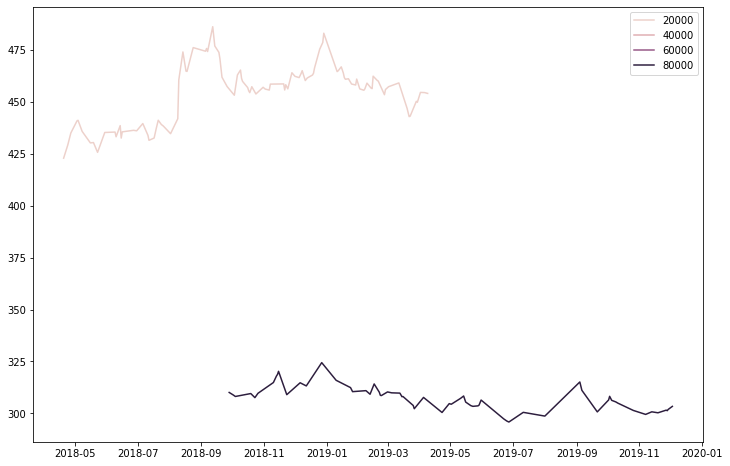

In [164]:
plt.figure(figsize=(12, 8))
# sns.lineplot(data=gr_table[['dates', 'SKU', 'price_per_sku']], x = )
# sns.lineplot(x = gr_table['dates'], y = gr_table['price_per_sku'], hue=gr_table['SKU'])
sns.lineplot(x = fst_gr_sku.dates.values, 
             y = fst_gr_sku.price_per_sku.values,
             hue = fst_gr_sku.SKU.values.astype(str),
             dashes=False,
            )


In [162]:
fst_gr_sku['dates'] = pd.to_datetime(fst_gr_sku.dates)
gr_pivot = fst_gr_sku.pivot_table(index='dates', columns='SKU', values='price_per_sku')
gr_pivot.head()

AttributeError: 'Series' object has no attribute 'dates'

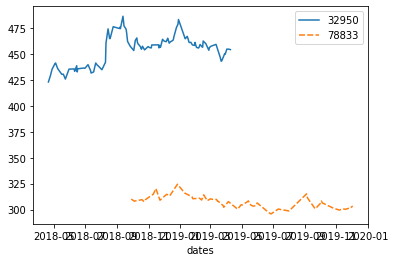

In [163]:
sns.lineplot(data=gr_pivot)

<Figure size 864x576 with 0 Axes>

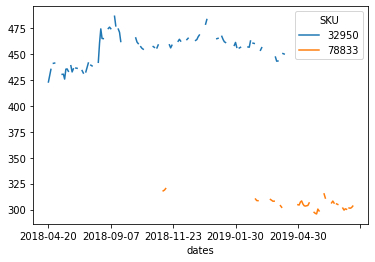

<Figure size 864x576 with 0 Axes>

In [135]:
fst_gr_sku.pivot(index="dates", columns="SKU", values="price_per_sku").plot()
plt.figure(figsize=(12,8))

In [167]:
fst_gr_sku.head()

,dates,SKU,price_per_sku,num_purchases,sku_gr
0,2018-04-20,32950,422.975,3,1
1,2018-04-24,32950,429.275,3,1
2,2018-04-27,32950,435.100,3,1
3,2018-04-30,32950,NaN,1,1
4,2018-05-03,32950,440.950,2,1


In [168]:
fst_gr_sku.num_purchases.describe()

count    245.000000
mean       1.473469
std        0.662452
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: num_purchases, dtype: float64

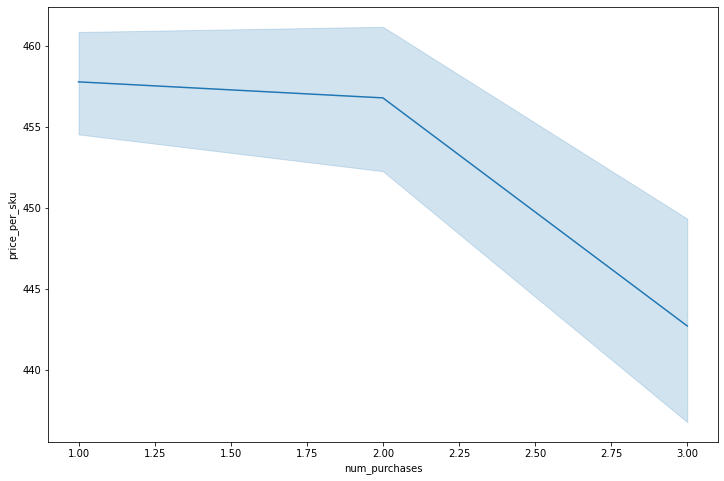

In [170]:
plt.figure(figsize=(12, 8))
sns.lineplot(x=fst_gr_sku[fst_gr_sku.SKU == 32950].num_purchases, 
             y=fst_gr_sku[fst_gr_sku.SKU == 32950].price_per_sku)

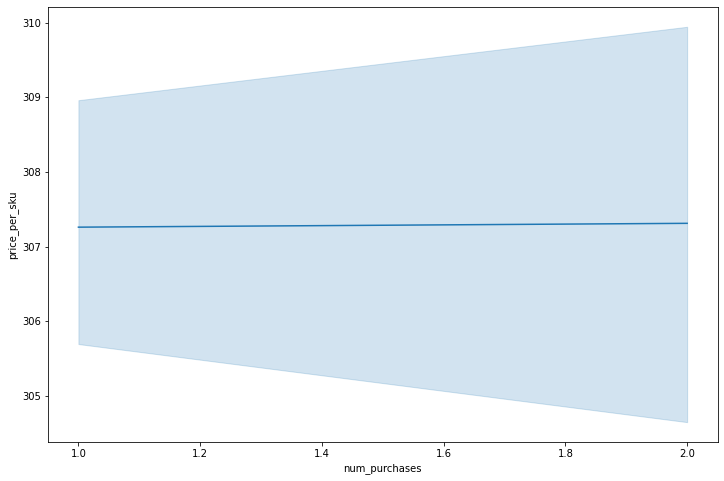

In [173]:
plt.figure(figsize=(12, 8))
sns.lineplot(x=fst_gr_sku[fst_gr_sku.SKU == 78833].num_purchases, 
             y=fst_gr_sku[fst_gr_sku.SKU == 78833].price_per_sku)

## task 3 3rd try (correct)

In [121]:
sec_gr_sku['dates'] = pd.to_datetime(sec_gr_sku['dates'])
sec_gr_sku['week_num'] = sec_gr_sku['dates'].dt.week
sec_gr_sku['year'] = sec_gr_sku['dates'].dt.year
sec_gr_sku.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,dates,SKU,price_per_sku,num_purchases,week_num,year
0,2018-04-19,10334,92.890,10,16,2018
1,2018-04-20,10334,92.890,11,16,2018
2,2018-04-21,10334,92.890,10,16,2018
3,2018-04-22,10334,92.890,12,16,2018
4,2018-04-23,10334,92.456,10,17,2018


In [122]:
promo_df = pd.read_csv('hw_data/promo_1510002.csv')
promo_df.head()

,year,week_num,SKU,discount
0,2019,1,90611,0.9
1,2019,2,10334,0.9
2,2019,3,68211,0.9
3,2019,4,10334,0.9
4,2019,5,72784,0.8


In [124]:
sec_promo_df = sec_gr_sku.merge(promo_df, on=['SKU', 'year', 'week_num'], how = 'left')
sec_promo_df['is_promo'] = (sec_promo_df.discount > 0).astype(int)
print(sum(sec_promo_df['is_promo']))
sec_promo_df

272


,dates,SKU,price_per_sku,num_purchases,week_num,year,discount,is_promo
0,2018-04-19,10334,92.890,10,16,2018,NaN,0
1,2018-04-20,10334,92.890,11,16,2018,NaN,0
2,2018-04-21,10334,92.890,10,16,2018,NaN,0
3,2018-04-22,10334,92.890,12,16,2018,NaN,0
4,2018-04-23,10334,92.456,10,17,2018,NaN,0
...,...,...,...,...,...,...,...,...
3744,2018-12-08,98255,67.032,7,49,2018,NaN,0
3745,2018-12-09,98255,67.032,9,49,2018,NaN,0
3746,2018-12-10,98255,67.116,7,50,2018,NaN,0
3747,2018-12-13,98255,67.116,9,50,2018,NaN,0


In [126]:
sec_promo_df_gr = sec_promo_df.groupby(['SKU', 'is_promo'], as_index=False).num_purchases.agg(np.mean)
sec_promo_df_gr

,SKU,is_promo,num_purchases
0,10334,0,9.980050
1,10334,1,11.977778
2,17812,0,3.613636
3,17812,1,5.934783
4,36096,0,11.414634
5,36096,1,12.923077
6,38767,0,9.000000
7,38767,1,10.222222
8,43678,0,9.448276
9,43678,1,12.090909


In [140]:
sec_promo_pivot = sec_promo_df_gr.pivot(index="SKU", columns="is_promo", values="num_purchases")
sec_promo_pivot["SKU"] = sec_promo_pivot.index
sec_promo_pivot

is_promo,0,1,SKU
SKU,,,
10334,9.980050,11.977778,10334
17812,3.613636,5.934783,17812
36096,11.414634,12.923077,36096
38767,9.000000,10.222222,38767
43678,9.448276,12.090909,43678
57561,8.050378,9.727273,57561
64619,4.329897,5.800000,64619
68211,11.459350,13.111111,68211
69997,4.333333,7.818182,69997


In [141]:
sec_promo_pivot.columns = ["mean_num_purchases_wo_promo", "mean_num_purchases_promo", "SKU"]

In [151]:
sec_promo_pivot = sec_promo_pivot[['SKU', 'mean_num_purchases_promo', 'mean_num_purchases_wo_promo']]
sec_promo_pivot

,SKU,mean_num_purchases_promo,mean_num_purchases_wo_promo
SKU,,,
10334,10334,11.977778,9.980050
17812,17812,5.934783,3.613636
36096,36096,12.923077,11.414634
38767,38767,10.222222,9.000000
43678,43678,12.090909,9.448276
57561,57561,9.727273,8.050378
64619,64619,5.800000,4.329897
68211,68211,13.111111,11.459350
69997,69997,7.818182,4.333333


In [152]:
sec_promo_pivot.to_csv("second_sku_sales_comparison.csv", index=False)

## task 3 2nd try

In [116]:
sec_gr_sku['dates'] = pd.to_datetime(sec_gr_sku['dates'])
sec_gr_sku.head()

,dates,SKU,price_per_sku,num_purchases
0,2018-04-19,10334,92.890,10
1,2018-04-20,10334,92.890,11
2,2018-04-21,10334,92.890,10
3,2018-04-22,10334,92.890,12
4,2018-04-23,10334,92.456,10


In [89]:
sec_gr_sku.dates.describe()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    3749
unique                    695
top       2019-06-19 00:00:00
freq                        9
first     2018-01-24 00:00:00
last      2019-12-24 00:00:00
Name: dates, dtype: object

In [62]:
sec_gr_sku['week_num'] = sec_gr_sku['dates'].dt.week
sec_gr_sku['year'] = sec_gr_sku['dates'].dt.year

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [63]:
promo_df = pd.read_csv('hw_data/promo_1510002.csv')
promo_df.head()

,year,week_num,SKU,discount
0,2019,1,90611,0.9
1,2019,2,10334,0.9
2,2019,3,68211,0.9
3,2019,4,10334,0.9
4,2019,5,72784,0.8


In [78]:
promo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      52 non-null     int64  
 1   week_num  52 non-null     int64  
 2   SKU       52 non-null     int64  
 3   discount  52 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.8 KB


In [92]:
sec_promo_df = sec_gr_sku.merge(promo_df, on=['SKU', 'year', 'week_num'], how = 'left')
sec_promo_df['is_promo'] = (sec_promo_df.discount > 0).astype(int)
print(sum(sec_promo_df['is_promo']))
sec_promo_df.info()

272
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 0 to 3748
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dates          3749 non-null   datetime64[ns]
 1   SKU            3749 non-null   int64         
 2   price_per_sku  3749 non-null   float64       
 3   num_purchases  3749 non-null   int64         
 4   sku_gr         3749 non-null   int64         
 5   week_num       3749 non-null   int64         
 6   year           3749 non-null   int64         
 7   discount       272 non-null    float64       
 8   is_promo       3749 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 292.9 KB


In [90]:
sec_promo_df

,dates,SKU,price_per_sku,num_purchases,sku_gr,week_num,year,discount,is_promo
0,2018-04-19,10334,92.890,10,2,16,2018,NaN,0
1,2018-04-20,10334,92.890,11,2,16,2018,NaN,0
2,2018-04-21,10334,92.890,10,2,16,2018,NaN,0
3,2018-04-22,10334,92.890,12,2,16,2018,NaN,0
4,2018-04-23,10334,92.456,10,2,17,2018,NaN,0
...,...,...,...,...,...,...,...,...,...
3744,2018-12-08,98255,67.032,7,2,49,2018,NaN,0
3745,2018-12-09,98255,67.032,9,2,49,2018,NaN,0
3746,2018-12-10,98255,67.116,7,2,50,2018,NaN,0
3747,2018-12-13,98255,67.116,9,2,50,2018,NaN,0


In [80]:
sec_promo_df_w = sec_promo_df.groupby(["SKU", "year", "week_num", "is_promo"], as_index=False).agg(
    num_purchases_w = pd.NamedAgg('num_purchases', sum)
)
sec_promo_df_w.head()

,SKU,year,week_num,is_promo,num_purchases_w
0,10334,2018,16,0,43
1,10334,2018,17,0,52
2,10334,2018,18,0,65
3,10334,2018,19,0,63
4,10334,2018,20,0,66


In [81]:
sum(sec_promo_df_w.is_promo)

51

In [86]:
sec_promo_df_w_gr = sec_promo_df_w.groupby(["SKU", "is_promo"], as_index=False).agg(
    num_purchases_w_mean = pd.NamedAgg('num_purchases_w', np.mean)
)
sec_promo_df_w_gr

,SKU,is_promo,num_purchases_w_mean
0,10334,0,49.407407
1,10334,1,67.375000
2,17812,0,16.169492
3,17812,1,34.125000
4,36096,0,52.000000
5,36096,1,84.000000
6,38767,0,42.063158
7,38767,1,55.200000
8,43678,0,43.840000
9,43678,1,66.500000


In [95]:
sec_promo_df_gr = sec_promo_df.groupby(["SKU", "dates", "is_promo"], as_index=False).agg(
    num_purchases = pd.NamedAgg('num_purchases', sum)
).groupby(["SKU", "is_promo"], as_index=False).agg(
    num_purchases_mean = pd.NamedAgg('num_purchases', np.mean)
)
sec_promo_df_gr

,SKU,is_promo,num_purchases_mean
0,10334,0,9.980050
1,10334,1,11.977778
2,17812,0,3.613636
3,17812,1,5.934783
4,36096,0,11.414634
5,36096,1,12.923077
6,38767,0,9.000000
7,38767,1,10.222222
8,43678,0,9.448276
9,43678,1,12.090909


In [94]:
sec_promo_df_gr = sec_promo_df.groupby(["SKU", "is_promo"], as_index=False).agg(
    num_purchases_mean = pd.NamedAgg('num_purchases', np.mean)
)
sec_promo_df_gr

,SKU,is_promo,num_purchases_mean
0,10334,0,9.980050
1,10334,1,11.977778
2,17812,0,3.613636
3,17812,1,5.934783
4,36096,0,11.414634
5,36096,1,12.923077
6,38767,0,9.000000
7,38767,1,10.222222
8,43678,0,9.448276
9,43678,1,12.090909


## task 3

In [8]:
sec_gr_sku['dates'] = pd.to_datetime(sec_gr_sku['dates'])
sec_gr_sku.head()

,dates,SKU,price_per_sku,num_purchases,sku_gr
0,2018-04-19,10334,92.890,10,2
1,2018-04-20,10334,92.890,11,2
2,2018-04-21,10334,92.890,10,2
3,2018-04-22,10334,92.890,12,2
4,2018-04-23,10334,92.456,10,2


In [9]:
sec_gr_sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dates          3749 non-null   datetime64[ns]
 1   SKU            3749 non-null   int64         
 2   price_per_sku  3749 non-null   float64       
 3   num_purchases  3749 non-null   int64         
 4   sku_gr         3749 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 146.6 KB


In [10]:
sec_gr_sku['week_num'] = sec_gr_sku['dates'].dt.week
sec_gr_sku['year'] = sec_gr_sku['dates'].dt.year

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [11]:
promo_df = pd.read_csv('hw_data/promo_1510002.csv')
promo_df.head()

,year,week_num,SKU,discount
0,2019,1,90611,0.9
1,2019,2,10334,0.9
2,2019,3,68211,0.9
3,2019,4,10334,0.9
4,2019,5,72784,0.8


In [12]:
promo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      52 non-null     int64  
 1   week_num  52 non-null     int64  
 2   SKU       52 non-null     int64  
 3   discount  52 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.8 KB


In [51]:
sec_promo_df = sec_gr_sku.merge(promo_df, on=['SKU', 'year', 'week_num'], how = 'left')
sec_promo_df['is_promo'] = (sec_promo_df.discount > 0).astype(int)
sec_promo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 0 to 3748
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dates          3749 non-null   datetime64[ns]
 1   SKU            3749 non-null   int64         
 2   price_per_sku  3749 non-null   float64       
 3   num_purchases  3749 non-null   int64         
 4   sku_gr         3749 non-null   int64         
 5   week_num       3749 non-null   int64         
 6   year           3749 non-null   int64         
 7   discount       272 non-null    float64       
 8   is_promo       3749 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 292.9 KB


In [54]:
sec_promo_df.head()

,dates,SKU,price_per_sku,num_purchases,sku_gr,week_num,year,discount,is_promo
0,2018-04-19,10334,92.890,10,2,16,2018,NaN,0
1,2018-04-20,10334,92.890,11,2,16,2018,NaN,0
2,2018-04-21,10334,92.890,10,2,16,2018,NaN,0
3,2018-04-22,10334,92.890,12,2,16,2018,NaN,0
4,2018-04-23,10334,92.456,10,2,17,2018,NaN,0


In [57]:
## by weeks
# sec_gr_sku.merge(promo_df, on=['SKU', 'year', 'week_num'], how = 'left')
sec_promo_df_w = sec_gr_sku.groupby(['SKU', 'year', 'week_num'], as_index=False).agg(
     num_purchases = pd.NamedAgg('num_purchases', sum)
    )
sec_promo_df_w.head()

,SKU,year,week_num,num_purchases
0,10334,2018,16,43
1,10334,2018,17,52
2,10334,2018,18,65
3,10334,2018,19,63
4,10334,2018,20,66


In [59]:
sec_promo_df_w = sec_promo_df_w.merge(promo_df, on=['SKU', 'year', 'week_num'], how = 'left')
sec_promo_df_w['is_promo'] = (sec_promo_df_w.discount > 0).astype(int)
sec_promo_df_w.info()

AttributeError: 'DataFrame' object has no attribute 'discount'

In [53]:
sec_promo_pivot = sec_promo_df.pivot_table(index='dates', columns='SKU', values='price_per_sku')
sec_promo_pivot.head()

SKU,10334,17812,36096,38767,43678,57561,64619,68211,69997,72784,83329,90611,98255
dates,,,,,,,,,,,,,
2018-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.294,NaN,NaN,NaN
2018-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.294,NaN,NaN,NaN
2018-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.294,NaN,NaN,NaN
2018-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.294,NaN,NaN,NaN
2018-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.420,NaN,NaN,NaN


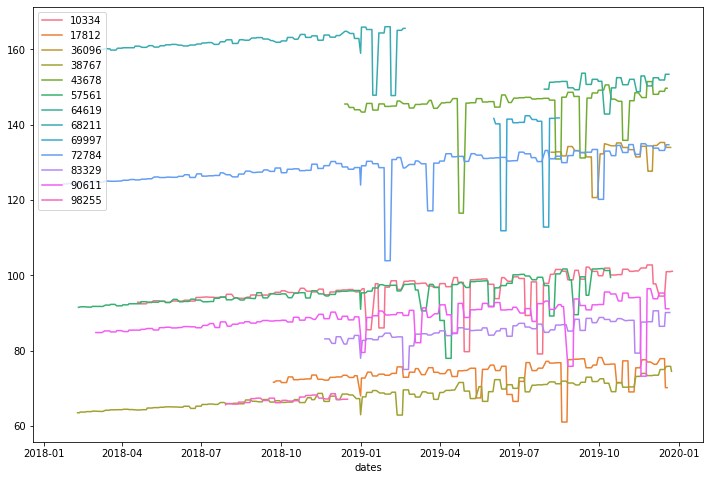

In [16]:
plt.figure(figsize=(12,8))
sns.lineplot(data=sec_promo_pivot, dashes=False)

In [17]:
sec_promo_df.head()

,dates,SKU,price_per_sku,num_purchases,sku_gr,week_num,year,discount,is_promo
0,2018-04-19,10334,92.890,10,2,16,2018,NaN,0
1,2018-04-20,10334,92.890,11,2,16,2018,NaN,0
2,2018-04-21,10334,92.890,10,2,16,2018,NaN,0
3,2018-04-22,10334,92.890,12,2,16,2018,NaN,0
4,2018-04-23,10334,92.456,10,2,17,2018,NaN,0


In [307]:
sec_promo_count_df = sec_promo_df.groupby(['SKU', 'is_promo'], as_index=False).agg(
    promo_count = pd.NamedAgg('discount', len)
)
sec_promo_count_df['promo_count'] = sec_promo_count_df.promo_count.astype(int)
sec_promo_count_df = sec_promo_count_df.loc[sec_promo_count_df.is_promo == 1]
sec_promo_count_df.head()

,SKU,is_promo,promo_count
1,10334,1,45
3,17812,1,46
5,36096,1,13
7,38767,1,27
9,43678,1,22


In [87]:
promo_df

,year,week_num,SKU,discount
0,2019,1,90611,0.90
1,2019,2,10334,0.90
2,2019,3,68211,0.90
3,2019,4,10334,0.90
4,2019,5,72784,0.80
5,2019,6,68211,0.90
6,2019,7,38767,0.90
7,2019,8,83329,0.90
8,2019,9,83329,0.95
9,2019,10,90611,0.90


In [347]:
promo_df.SKU.isin(sec_gr_sku.SKU).sum() == len(promo_df.SKU)
promo_gr_df = promo_df.groupby('SKU', as_index=False).discount.agg('count')
promo_gr_df.columns = ['SKU', 'promo_count']
promo_gr_df.head()

,SKU,promo_count
0,10334,8
1,17812,8
2,36096,3
3,38767,5
4,43678,4


In [317]:
# sec_promo_count_df.to_csv('second_sku_promo_count.csv', index=False)
promo_gr_df.to_csv('second_sku_promo_count.csv', index=False)

In [305]:
sec_promo_df.groupby(['SKU', 'is_promo'], as_index=False).agg(
    mean_num_purchases = pd.NamedAgg('num_purchases', np.mean)
).head()

,SKU,is_promo,mean_num_purchases
0,10334,0,9.980050
1,10334,1,11.977778
2,17812,0,3.613636
3,17812,1,5.934783
4,36096,0,11.414634


In [29]:
promo_all_dates = sec_promo_df.loc[sec_promo_df.is_promo == 1, 'dates'].unique()
sec_promo_df['is_all_promo'] = 0
sec_promo_df.loc[sec_promo_df.dates.isin(promo_all_dates), 'is_all_promo'] = 1
sec_promo_df.head()

,dates,SKU,price_per_sku,num_purchases,sku_gr,week_num,year,discount,is_promo,is_all_promo
0,2018-04-19,10334,92.890,10,2,16,2018,NaN,0,0
1,2018-04-20,10334,92.890,11,2,16,2018,NaN,0,0
2,2018-04-21,10334,92.890,10,2,16,2018,NaN,0,0
3,2018-04-22,10334,92.890,12,2,16,2018,NaN,0,0
4,2018-04-23,10334,92.456,10,2,17,2018,NaN,0,0


In [35]:
np.nanmean(sec_promo_df['discount'])
np.mean(sec_promo_df['discount'])

0.8955882352941176

In [36]:
sec_promo_df.groupby(['SKU', 'is_all_promo'], as_index=False).agg(
    mean_num_purchases = pd.NamedAgg('num_purchases', np.nanmean)
).head()

,SKU,is_all_promo,mean_num_purchases
0,10334,0,10.361345
1,10334,1,9.975962
2,17812,0,4.052174
3,17812,1,3.902564
4,36096,0,11.250000


In [49]:
sku_seq = sec_promo_df.SKU.unique()
sku_seq


array([10334, 17812, 36096, 38767, 43678, 57561, 64619, 68211, 69997,
       72784, 83329, 90611, 98255])

In [50]:

for sku_i in sku_seq:
#     squ_i_promo_dates = promo_df.loc[]
    print(promo_df.loc[promo_df.SKU == sku_i])



    year  week_num    SKU  discount
1   2019         2  10334      0.90
3   2019         4  10334      0.90
17  2019        18  10334      0.80
22  2019        23  10334      0.95
27  2019        28  10334      0.90
29  2019        30  10334      0.80
48  2019        49  10334      0.95
49  2019        50  10334      0.95
    year  week_num    SKU  discount
19  2019        20  17812      0.90
24  2019        25  17812      0.90
25  2019        26  17812      0.90
26  2019        27  17812      0.95
33  2019        34  17812      0.80
42  2019        43  17812      0.95
44  2019        45  17812      0.90
50  2019        51  17812      0.90
    year  week_num    SKU  discount
38  2019        39  36096      0.90
47  2019        48  36096      0.95
51  2019        52  36096      0.90
    year  week_num    SKU  discount
6   2019         7  38767      0.90
12  2019        13  38767      0.95
18  2019        19  38767      0.95
20  2019        21  38767      0.95
41  2019        42  38767   

In [38]:
#  sec_promo_df_w.groupby(['SKU', 'is_promo', 'year', 'week_num'], as_index=False).agg(
sec_promo_pivot = \
    sec_promo_df.groupby(['SKU', 'is_all_promo'], as_index=False).agg( \
#     mean_num_purchases = pd.NamedAgg('num_purchases', np.nanmean)
#     weekly_num_purchases = pd.NamedAgg('num_purchases', sum)
#     ).groupby(['SKU', 'is_promo'], as_index=False).agg(
    mean_num_purchases = pd.NamedAgg('num_purchases', np.nanmean)
).pivot_table(index='SKU', columns='is_all_promo', values='mean_num_purchases', fill_value=0)
#     ).pivot_table(index='SKU', columns='is_promo', values='mean_num_purchases', )
sec_promo_pivot['SKU'] = sec_promo_pivot.index
sec_promo_pivot

is_all_promo,0,1,SKU
SKU,,,
10334,10.361345,9.975962,10334
17812,4.052174,3.902564,17812
36096,11.250000,11.720000,36096
38767,9.314079,8.721649,38767
43678,9.586207,9.704082,43678
57561,8.365019,7.886228,57561
64619,4.250000,4.448718,64619
68211,11.599099,10.969697,68211
69997,4.166667,5.120000,69997


In [39]:
sec_promo_pivot.columns = ['mean_num_purchases_wo_promo', 'mean_num_purchases_promo', 'SKU']
sec_promo_pivot.head()

,mean_num_purchases_wo_promo,mean_num_purchases_promo,SKU
SKU,,,
10334,10.361345,9.975962,10334
17812,4.052174,3.902564,17812
36096,11.250000,11.720000,36096
38767,9.314079,8.721649,38767
43678,9.586207,9.704082,43678


In [40]:
sec_promo_pivot = sec_promo_pivot[['SKU', 'mean_num_purchases_promo', 'mean_num_purchases_wo_promo']]
sec_promo_pivot.head()

,SKU,mean_num_purchases_promo,mean_num_purchases_wo_promo
SKU,,,
10334,10334,9.975962,10.361345
17812,17812,3.902564,4.052174
36096,36096,11.720000,11.250000
38767,38767,8.721649,9.314079
43678,43678,9.704082,9.586207


In [44]:
sec_promo_pivot

,SKU,mean_num_purchases_promo,mean_num_purchases_wo_promo,num_purch_diff
SKU,,,,
10334,10334,9.975962,10.361345,-0.385383
17812,17812,3.902564,4.052174,-0.149610
36096,36096,11.720000,11.250000,0.470000
38767,38767,8.721649,9.314079,-0.592430
43678,43678,9.704082,9.586207,0.117875
57561,57561,7.886228,8.365019,-0.478791
64619,64619,4.448718,4.250000,0.198718
68211,68211,10.969697,11.599099,-0.629402
69997,69997,5.120000,4.166667,0.953333


In [41]:
sec_promo_pivot.to_csv('second_sku_sales_comparison.csv', index=False)

In [42]:
sec_promo_pivot['num_purch_diff'] = sec_promo_pivot.mean_num_purchases_promo - sec_promo_pivot.mean_num_purchases_wo_promo
sec_promo_pivot.sort_values('num_purch_diff', ascending=False)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,SKU,mean_num_purchases_promo,mean_num_purchases_wo_promo,num_purch_diff
SKU,,,,
69997,69997,5.120000,4.166667,0.953333
36096,36096,11.720000,11.250000,0.470000
64619,64619,4.448718,4.250000,0.198718
43678,43678,9.704082,9.586207,0.117875
17812,17812,3.902564,4.052174,-0.149610
83329,83329,9.482051,9.681319,-0.199267
10334,10334,9.975962,10.361345,-0.385383
57561,57561,7.886228,8.365019,-0.478791
38767,38767,8.721649,9.314079,-0.592430


In [43]:
promo_df.loc[promo_df['SKU'] == 98255]

,year,week_num,SKU,discount


## task 4

In [455]:
trd_gr_sku['dates'] = pd.to_datetime(trd_gr_sku['dates'])
trd_gr_sku['year'] = trd_gr_sku['dates'].dt.year
trd_gr_sku['week_num'] = trd_gr_sku['dates'].dt.week
trd_gr_sku.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,dates,SKU,price_per_sku,num_purchases,sku_gr,year,week_num
0,2018-04-22,11050,101.575,10,3,2018,16
1,2018-04-23,11050,101.344,9,3,2018,17
2,2018-04-25,11050,101.344,9,3,2018,17
3,2018-04-26,11050,101.344,9,3,2018,17
4,2018-04-27,11050,101.344,10,3,2018,17


In [462]:
trd_gr_sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dates          2781 non-null   datetime64[ns]
 1   SKU            2781 non-null   int64         
 2   price_per_sku  2781 non-null   float64       
 3   num_purchases  2781 non-null   int64         
 4   sku_gr         2781 non-null   int64         
 5   year           2781 non-null   int64         
 6   week_num       2781 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 152.2 KB


In [456]:
conc_df = pd.read_csv('hw_data/conc_df.csv')
conc_df

,SKU,year,week_num,ret_net_code,price_per_sku
0,84395,2019,18,1,164.69400
1,84395,2019,18,2,164.69400
2,84395,2019,18,3,134.50010
3,84395,2019,22,1,165.19800
4,84395,2019,22,2,136.28835
...,...,...,...,...,...
3004,89272,2019,18,2,133.93820
3005,89272,2019,18,3,121.76200
3006,80308,2019,47,1,115.77984
3007,80308,2019,47,2,118.19192


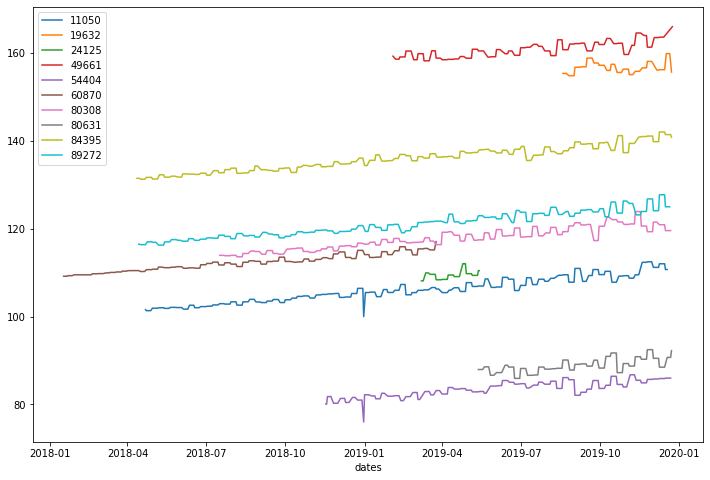

In [464]:
trd_sku_pivot = trd_gr_sku.pivot_table(index='dates', values='price_per_sku', columns='SKU')
plt.figure(figsize=(12,8))
sns.lineplot(data=trd_sku_pivot, dashes=False)

In [521]:
conc_sku_count = conc_df.SKU.value_counts()

In [522]:
d = {'SKU': conc_sku_count.index.values, 'conc_rows_count': conc_sku_count.values}
conc_sku_rows = pd.DataFrame(d, columns=['SKU', 'conc_rows_count'])

conc_sku_rows

,SKU,conc_rows_count
0,80308,453
1,84395,399
2,89272,396
3,49661,387
4,11050,384
5,54404,384
6,80631,261
7,19632,147
8,60870,105
9,24125,93


In [523]:
conc_sku_rows.to_csv('third_sku_competitor_count.csv', index=False)

In [524]:
trd_gr_sku.head()

,dates,SKU,price_per_sku,num_purchases,sku_gr,year,week_num
0,2018-04-22,11050,101.575,10,3,2018,16
1,2018-04-23,11050,101.344,9,3,2018,17
2,2018-04-25,11050,101.344,9,3,2018,17
3,2018-04-26,11050,101.344,9,3,2018,17
4,2018-04-27,11050,101.344,10,3,2018,17


In [574]:
trd_sku_conc = trd_gr_sku.merge(conc_df, how='left', on=['SKU', 'year', 'week_num'], suffixes=(None, '_conc'))
# trd_sku_conc = trd_gr_sku.merge(conc_df, how='left', on='SKU', suffixes=(None, '_conc'))
trd_sku_conc.head()

,dates,SKU,price_per_sku,num_purchases,sku_gr,year,week_num,ret_net_code,price_per_sku_conc,year_week,date_w
0,2018-04-22,11050,101.575,10,3,2018,16,NaN,NaN,NaN,NaT
1,2018-04-23,11050,101.344,9,3,2018,17,NaN,NaN,NaN,NaT
2,2018-04-25,11050,101.344,9,3,2018,17,NaN,NaN,NaN,NaT
3,2018-04-26,11050,101.344,9,3,2018,17,NaN,NaN,NaN,NaT
4,2018-04-27,11050,101.344,10,3,2018,17,NaN,NaN,NaN,NaT


In [575]:
trd_sku_conc_min = trd_sku_conc.groupby(['SKU', 'year', 'week_num'], as_index=False).agg(
    price_per_sku_conc_min = pd.NamedAgg('price_per_sku_conc', min)
)
trd_sku_conc_min.head()

,SKU,year,week_num,price_per_sku_conc_min
0,11050,2018,1,NaN
1,11050,2018,16,NaN
2,11050,2018,17,NaN
3,11050,2018,18,NaN
4,11050,2018,19,NaN


In [576]:
trd_sku_conc = trd_sku_conc.merge(trd_sku_conc_min, how='left', on=['SKU', 'year', 'week_num'])
trd_sku_conc.head()

,dates,SKU,price_per_sku,num_purchases,sku_gr,year,week_num,ret_net_code,price_per_sku_conc,year_week,date_w,price_per_sku_conc_min
0,2018-04-22,11050,101.575,10,3,2018,16,NaN,NaN,NaN,NaT,NaN
1,2018-04-23,11050,101.344,9,3,2018,17,NaN,NaN,NaN,NaT,NaN
2,2018-04-25,11050,101.344,9,3,2018,17,NaN,NaN,NaN,NaT,NaN
3,2018-04-26,11050,101.344,9,3,2018,17,NaN,NaN,NaN,NaT,NaN
4,2018-04-27,11050,101.344,10,3,2018,17,NaN,NaN,NaN,NaT,NaN


In [577]:
trd_sku_conc['is_our_price_low'] = (trd_sku_conc.price_per_sku <= trd_sku_conc.price_per_sku_conc_min).astype(int)
trd_sku_conc.head()

,dates,SKU,price_per_sku,num_purchases,sku_gr,year,week_num,ret_net_code,price_per_sku_conc,year_week,date_w,price_per_sku_conc_min,is_our_price_low
0,2018-04-22,11050,101.575,10,3,2018,16,NaN,NaN,NaN,NaT,NaN,0
1,2018-04-23,11050,101.344,9,3,2018,17,NaN,NaN,NaN,NaT,NaN,0
2,2018-04-25,11050,101.344,9,3,2018,17,NaN,NaN,NaN,NaT,NaN,0
3,2018-04-26,11050,101.344,9,3,2018,17,NaN,NaN,NaN,NaT,NaN,0
4,2018-04-27,11050,101.344,10,3,2018,17,NaN,NaN,NaN,NaT,NaN,0


In [578]:
trd_sku_conc.head()

,dates,SKU,price_per_sku,num_purchases,sku_gr,year,week_num,ret_net_code,price_per_sku_conc,year_week,date_w,price_per_sku_conc_min,is_our_price_low
0,2018-04-22,11050,101.575,10,3,2018,16,NaN,NaN,NaN,NaT,NaN,0
1,2018-04-23,11050,101.344,9,3,2018,17,NaN,NaN,NaN,NaT,NaN,0
2,2018-04-25,11050,101.344,9,3,2018,17,NaN,NaN,NaN,NaT,NaN,0
3,2018-04-26,11050,101.344,9,3,2018,17,NaN,NaN,NaN,NaT,NaN,0
4,2018-04-27,11050,101.344,10,3,2018,17,NaN,NaN,NaN,NaT,NaN,0


In [588]:
# trd_price_conc_gr = trd_sku_conc.groupby(['SKU', 'year', 'week_num'], as_index=False).agg({'is_our_price_low': max}\
#     ).groupby('SKU', as_index=False).agg({'is_our_price_low': sum})
# trd_price_conc_gr = trd_sku_conc.groupby('SKU', as_index=False).agg({'is_our_price_low': sum})
trd_price_conc_gr = trd_sku_conc.groupby('SKU', as_index=False).agg({'is_our_price_low': max})
trd_price_conc_gr.columns = ['SKU', 'lowest_price_rows_count']
trd_price_conc_gr

,SKU,lowest_price_rows_count
0,11050,0
1,19632,0
2,24125,0
3,49661,1
4,54404,1
5,60870,0
6,80308,0
7,80631,0
8,84395,1
9,89272,1


In [589]:
# trd_price_conc_gr = trd_sku_conc.groupby('SKU', as_index=False).agg({'is_our_price_low': sum})
# trd_price_conc_gr.columns = ['SKU', 'lowest_price_rows_count']
# trd_price_conc_gr.head()

In [590]:
trd_price_conc_gr.to_csv('third_sku_le_price.csv', index=False)

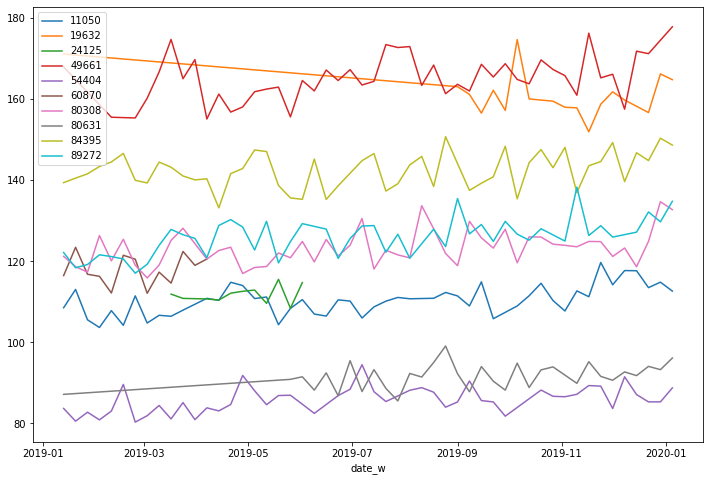

In [538]:
# date from year & week
conc_df['year_week'] = conc_df['year'].astype(str) + conc_df['week_num'].astype(str) + '0'
conc_df['date_w'] = pd.to_datetime(conc_df['year_week'], format='%Y%W%w')
# pd.to_datetime('2020120', format='%Y%W%w')

conc_sku_pivot = conc_df.pivot_table(index='date_w', values='price_per_sku', columns='SKU')
plt.figure(figsize=(12,8))
sns.lineplot(data=conc_sku_pivot, dashes=False)

In [556]:
conc_df['date_w']

0      2019-05-12
1      2019-05-12
2      2019-05-12
3      2019-06-09
4      2019-06-09
          ...    
3004   2019-05-12
3005   2019-05-12
3006   2019-12-01
3007   2019-12-01
3008   2019-12-01
Name: date_w, Length: 3009, dtype: datetime64[ns]

## task 4 2nd try

In [160]:
import itertools

In [161]:
trd_gr_sku = pd.read_csv('hw_data/third_group_sku.csv')

In [162]:
trd_gr_sku['dates'] = pd.to_datetime(trd_gr_sku['dates'])
trd_gr_sku['year'] = trd_gr_sku['dates'].dt.year
trd_gr_sku['week_num'] = trd_gr_sku['dates'].dt.week
trd_gr_sku.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,dates,SKU,price_per_sku,num_purchases,year,week_num
0,2018-04-22,11050,101.575,10,2018,16
1,2018-04-23,11050,101.344,9,2018,17
2,2018-04-25,11050,101.344,9,2018,17
3,2018-04-26,11050,101.344,9,2018,17
4,2018-04-27,11050,101.344,10,2018,17


In [163]:
conc_df = pd.read_csv('hw_data/conc_df.csv')
conc_df

,SKU,year,week_num,ret_net_code,price_per_sku
0,84395,2019,18,1,164.69400
1,84395,2019,18,2,164.69400
2,84395,2019,18,3,134.50010
3,84395,2019,22,1,165.19800
4,84395,2019,22,2,136.28835
...,...,...,...,...,...
3004,89272,2019,18,2,133.93820
3005,89272,2019,18,3,121.76200
3006,80308,2019,47,1,115.77984
3007,80308,2019,47,2,118.19192


In [164]:
comp_min_price_per_sku_df = conc_df.groupby(["SKU", "year", "week_num"], as_index=False).agg(
    price_per_sku_comp_min = pd.NamedAgg('price_per_sku', min))
comp_min_price_per_sku_df

,SKU,year,week_num,price_per_sku_comp_min
0,11050,2019,1,101.25600
1,11050,2019,2,103.45370
2,11050,2019,3,100.35456
3,11050,2019,4,101.91360
4,11050,2019,5,101.26848
...,...,...,...,...
365,89272,2019,47,118.96128
366,89272,2019,49,119.13600
367,89272,2019,50,122.61696
368,89272,2019,51,119.99616


In [179]:
sku_n_dict = {}
sku_list = comp_min_price_per_sku_df.SKU.unique

for idx, sku_row in comp_min_price_per_sku_df.iterrows():
    try:
        sku_n_dict[sku_row.SKU] += 0
    except:
        sku_n_dict[sku_row.SKU] = 0
    
    sku_n_dict[sku_row.SKU] += \
    ((sku_row.SKU == trd_gr_sku.SKU) & \
        (sku_row.week_num == trd_gr_sku.week_num) & \
        (sku_row.year == trd_gr_sku.year) & 
        (sku_row.price_per_sku_comp_min >= trd_gr_sku.price_per_sku)).astype(int).sum()
        

In [190]:
sku_n_dict.keys()
sku_n_df = pd.DataFrame.from_dict(sku_n_dict, orient='index').reset_index()
sku_n_df

,index,0
0,11050.0,0
1,19632.0,0
2,24125.0,0
3,49661.0,3
4,54404.0,13
5,60870.0,0
6,80308.0,0
7,80631.0,0
8,84395.0,14
9,89272.0,7


In [198]:
sku_n_df.columns = ['SKU', 'lowest_price_rows_count']
sku_n_df = sku_n_df.loc[sku_n_df.lowest_price_rows_count > 0, ]
sku_n_df.SKU = sku_n_df.SKU.astype(int)
sku_n_df

,SKU,lowest_price_rows_count
3,49661,3
4,54404,13
8,84395,14
9,89272,7


In [199]:
sku_n_df.to_csv('third_sku_le_price.csv', index=False)